<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>





# Introduction to Feature Effects in Machine Learning: Understanding ALE Plots

Estimated time needed: **120** minutes

Imagine you're working for a construction company that builds houses. You've developed a machine learning model to predict house prices per square foot based on various features like size, number of bathrooms, location, and other characteristics. Your model performs well in terms of accuracy, but now you want to understand how each feature influences the predictions.

## The Challenge with Traditional Methods

Initially, you might turn to Partial Dependence (PD) plots, a common interpretability technique. However, you notice something puzzling: the plots suggest that increasing the number of bathrooms leads to lower house prices. This counterintuitive result highlights a key limitation of PD plots—they struggle with correlated features.

Why does this happen? Consider these scenarios:
- A small house (1000 sq ft) with 10 bathrooms might have an unusually high price per square foot.
- A large house (5000 sq ft) naturally has more bathrooms but a lower price per square foot.

The correlation between house size and the number of bathrooms confuses the PD plot, making it unclear whether changes in price are due to the number of bathrooms or the house size.

## Introducing ALE Plots

This is where Accumulated Local Effects (ALE) plots come in. ALE plots are designed specifically to handle correlated features, providing more reliable insights into how individual features affect model predictions.

In this guided project, you'll:
- Analyze a bike-sharing dataset to demonstrate why PD plots can fail.
- Explore Marginal plots and understand their limitations with conditional distributions.
- Learn how ALE plots work through intuitive explanations and practical examples.
- Implement ALE plots using both real-world random forest models and simulated linear datasets.
- Understand the advantages of ALE plots, including their computational efficiency.
- Examine when and why to use ALE plots versus other methods.

The appendix will cover more theoretical aspects for those interested in the mathematical foundations.


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Background-(optional)">Background (optional)</a>
        <ol>
            <li><a href="#What-does-[Subject-of-the-Lab]-do?">What does [Subject of the Lab] do?</a></li>
            <li><a href="#How-does-[Subject-of-the-Lab]-work?">How does [Subject of the Lab] work?</a></li>
        </ol>
    </li>
    <li><a href="#Example-1---Classification-Problem.--Predicting-the-types-of-Iris-flowers">Example 1: Classification Problem. Predicting the types of Iris flowers</a></li>
    <li><a href="#Example-2---Model-Building.-Application-of-reading-cheques">Example 2: Model Building. Application of reading cheques</a></li>
</ol>

<a href="#Exercises">Exercises</a>
<ol>
    <li><a href="#Exercise-1---Loading-a-dataset-(wine-dataset)">Exercise 1. Loading a dataset (wine dataset)</a></li>
    <li><a href="#Exercise-2---Type-in-Exercise-2-subject-here">Exercise 2. Type in Exercise 2 subject here</a></li>
    <li><a href="#Exercise-3---Type-in-Exercise-3-subject-here">Exercise 3. Type in Exercise 3 subject here</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 - Use [Subject of Lab] to solve [X kind of Problem].


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries


In [3]:
%pip install tqdm==4.65.0 numpy==1.24.3 pandas==2.0.2 matplotlib==3.7.1 seaborn==0.12.2 scikit-learn==1.2.2 alibi==0.9.0 ucimlrepo==0.0.3

  Using cached tqdm-4.65.0-py3-none-any.whl.metadata (56 kB)
  Using cached numpy-1.24.3.tar.gz (10.9 MB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/opt/conda/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/opt/conda/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/conda/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                 

This package demonstrates the limitations of Partial Dependence Plots (PDPs) and M-Plots while highlighting the advantages of Accumulated Local Effects (ALE) Plots in Python.  [PDP Limitations Analysis](https://github.com/jsantarc/pdp_limitations)


In [4]:
! wget https://raw.githubusercontent.com/jsantarc/pdp_limitations/refs/heads/main/pdp_limitations.py

--2025-01-24 17:45:44--  https://raw.githubusercontent.com/jsantarc/pdp_limitations/refs/heads/main/pdp_limitations.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
200 OKequest sent, awaiting response... 
Length: 6873 (6.7K) [text/plain]
Saving to: ‘pdp_limitations.py’

pdp_limitations.py  100%[===================>]   6.71K  --.-KB/s    in 0s      

2025-01-24 17:45:44 (13.8 MB/s) - ‘pdp_limitations.py’ saved [6873/6873]



### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [12]:
from tqdm import tqdm
import numpy as np
import pandas as pd

from sklearn.inspection import PartialDependenceDisplay


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


import time 
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [13]:
from pdp_limitations import (
    PDP_scatter,
    conditional_expectation_plot,
    generate_correlated_data,
    plot_predicted_surface,
    demonstrate_pdp_problems,
    custom_pdp_plot
)

## Load the Dataset

Fetches the Bike Sharing Dataset from the UCI Machine Learning Repository using its unique identifier, ```fetch_ucirepo(id=275)``` Fetches the Bike Sharing Dataset from the UCI Machine Learning Repository using its unique identifier.



In [14]:
from ucimlrepo import fetch_ucirepo 

# Fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# Extract features and target
X = bike_sharing.data.features
y = bike_sharing.data.targets



We can plot the first five samples of data


In [15]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


This table provides a detailed breakdown of the features in the Bike Sharing Dataset, which are used for predicting bike rental counts. Here's an explanation of each feature:


| Index | Feature Name      | Description                                                                 |
|-------|-------------------|-----------------------------------------------------------------------------|
| 0     | season            | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)                          |
| 1     | yr                | Year (0: 2011, 1: 2012)                                                    |
| 2     | mnth              | Month (1 to 12)                                                            |
| 3     | hr                | Hour of the day (0 to 23)                                                  |
| 4     | holiday           | Whether the day is a holiday (0: No, 1: Yes)                               |
| 5     | weekday           | Day of the week (0: Sunday, 1: Monday, ..., 6: Saturday)                   |
| 6     | workingday        | Whether the day is a working day (0: No, 1: Yes)                           |
| 7     | weathersit        | Weather situation (1: Clear, 2: Misty, 3: Rain/Snow/Storm)                 |
| 8     | temp              | Normalized temperature in Celsius (0 to 1 scale)                           |
| 9     | atemp             | Normalized apparent temperature in Celsius (0 to 1 scale)                 |
| 10    | hum               | Normalized humidity (0 to 1 scale)                                         |
| 11    | windspeed         | Normalized windspeed (0 to 1 scale)                                        |
| 12    | days_since_2011   | Total number of days since January 1, 2011                                 


The Bike Sharing Dataset is useful for Local Accumulated Effect plots because partial dependence plots fail to handle unrelated data points, such as season and month—for example, you will never see August in Fall. Additionally, features like temperature and season are correlated, making other methods like partial dependence plots ineffective at capturing local effects. Another critical aspect is the interaction between weather conditions (e.g., weather situation and humidity), which Local Accumulated Effect plots can isolate and interpret more accurately. 

Other reasons include that this dataset has features with nonlinear relationships (e.g., temperature and bike rentals), where Local Accumulated Effect plots excel, and temporal features like hour and month, where the effects on predictions vary significantly across subgroups.


This code converts the `dteday` column to a datetime format and calculates the number of days since January 1, 2011, storing it in a new column, `days_since_2011`. By subtracting the baseline date (`2011-01-01`) from each entry in `dteday`, it computes the difference as a `timedelta` object, which is then converted to a float representing days by dividing the total seconds by the number of seconds in a day. This feature is useful for analyzing temporal trends or including time as a numerical variable in predictive models.


In [16]:
X["dteday"]=X["dteday"].map(pd.to_datetime)
X["days_since_2011"]=X['dteday']-pd.to_datetime('2011-01-01')
X["days_since_2011"]=X["days_since_2011"].dt.total_seconds() / (24 * 3600)


Next we  removes the `dteday` column from the dataset using the `drop` method with the parameter `axis=1`, indicating column removal, and `inplace=True` to modify the DataFrame directly, reducing redundancy in the dataset.


In [17]:
X.drop(labels='dteday',  axis=1, inplace=True)
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,days_since_2011
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.0


This code calculates the correlation matrix for the features in the dataset `X` using the `corr` method, which computes pairwise Pearson correlation coefficients between all numeric features. The `sns.heatmap` function visualizes the matrix as a heatmap, where colors represent the strength and direction of correlations: positive correlations are shown in red, negative correlations in blue, and weak or no correlations in white.

### Issues with Correlated Features, Especially for Marginal Plots
We will discuss Marginal Plots (M-plots) later to delve deeper into these limitations and explore alternative approaches to address these challenges. However, like many other methods, M-plots are also influenced by correlated features


- **Highly Correlated Features**: Features like `temperature` and `apparent temperature` are expected to have high positive correlations, which can lead to redundancy and multicollinearity issues in predictive models.
- **Impact on Marginal Plots**: Marginal plots, such as partial dependence plots, fail to account for the interactions between correlated features. For instance, if `temperature` and `season` are correlated, a marginal plot for `temperature` might produce misleading results by ignoring the influence of `season`, leading to unrealistic or averaged predictions.
- **Misleading Averaging**: Marginal plots average predictions across the dataset without considering the true relationships between correlated features, often resulting in oversimplified interpretations that fail to capture local variations.

 We will discuss marginal plots (M plots) later to explore these limitations in more detail and demonstrate alternative approaches to address these challenges,but like many other methods they are affected by corrlated feateurs 


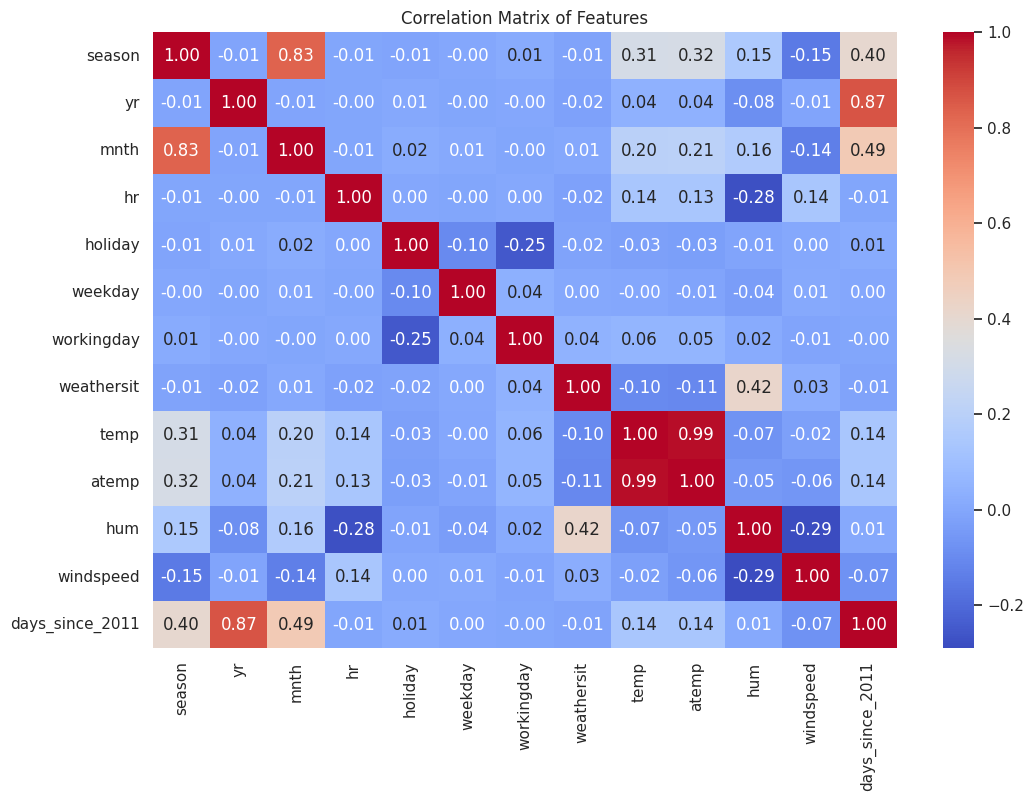

In [18]:
# Calculate the correlation matrix
correlation_matrix = X.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

This code splits the dataset into training and testing sets, allocating 80% for training and 20% for testing, ensuring reproducibility with a fixed random state. A `RandomForestRegressor` is trained on the training set, despite an unnecessary import for `LinearRegression`. Random forests are well-suited for handling correlated features, as they mitigate multicollinearity issues and capture complex interactions. This model choice is ideal for exploring interpretation methods, as marginal plots often fail to represent these interactions accurately, whereas Local Accumulated Effect plots can effectively highlight localized effects.


In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

The `model.score(X_test, y_test)` method calculates the coefficient of determination, also known as \( R^2 \), for the model on the test data. This metric evaluates how well the model's predictions align with the actual target values, with a value of 1 indicating perfect predictions and values closer to 0 or negative indicating poor performance. It is particularly useful for assessing the effectiveness of the trained `RandomForestRegressor` on unseen data, helping to understand the model's generalization ability.


In [20]:
model.score(X_test,y_test)

0.9477020481905961

After validating the model's generalization performance, we train it on the complete dataset using ```model.fit(X, y)```. This final training step leverages all available data points to maximize the model's predictive capabilities for real-world applications.



In [21]:
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

### Partial Dependence Plots (PDP)

Partial Dependence Plots (PDP) are a powerful tool for interpreting machine learning models. They show the relationship between a feature (or pair of features) and the model's predictions, offering insights into the model's behavior. However, while PDPs are effective at illustrating what the model has learned, they do not necessarily reflect the underlying data distribution. This can lead to several challenges when interpreting PDPs. For the  [Here](#toc1_2_)    


If our training set has not encountered certain data ranges before, a partial dependence plot will extrapolate predictions in those regions, which can lead to poor results. For example, in the bike rental dataset, if the model only sees moderately high temperatures like 25 degrees during training, it might predict that people are likely to rent bikes at such temperatures. However, if the partial dependence plot evaluates the model at an unrealistic temperature like 50 degrees (which the dataset has not seen), the model will still produce a prediction based on extrapolation. This is particularly problematic for models like decision trees, which are designed to interpolate within the training data range but perform poorly when forced to extrapolate beyond it. 

This code extracts the feature names for the specified indices [8, 9, -2, -1], corresponding to 'weathersit', 'temp', 'hum', and 'windspeed' in the dataset.



In [22]:

featuer_names=[X.columns[ feature] for  feature in [8,9,-2,-1]]
print(featuer_names)

['temp', 'atemp', 'windspeed', 'days_since_2011']


The issue with these features for partial dependence plots (PDP)  that the model may not have seen certain values in the training data, leading to extrapolation in the PDP. For example, if the maximum observed `temp` in the training set corresponds to 25°C (or 1 in normalized scale), and the PDP evaluates predictions for 50°C (or 2), the model is forced to extrapolate to unseen data points, which can lead to invalid or nonsensical predictions.  For features like `temp`, `hum`, and `windspeed`, PDP assumes that the model can meaningfully predict for extreme or unrealistic values, which misrepresents the true behavior of the model.


The `custom_pdp_plot` function generates partial dependence plots (PDP) by averaging model predictions across all instances for a range of values of a specified feature. In this example, the grid range is deliberately extended beyond the observed data (`grid_range = (X[f_name].min(), X[f_name].max() + 1)`), leading to predictions for unrealistic values.


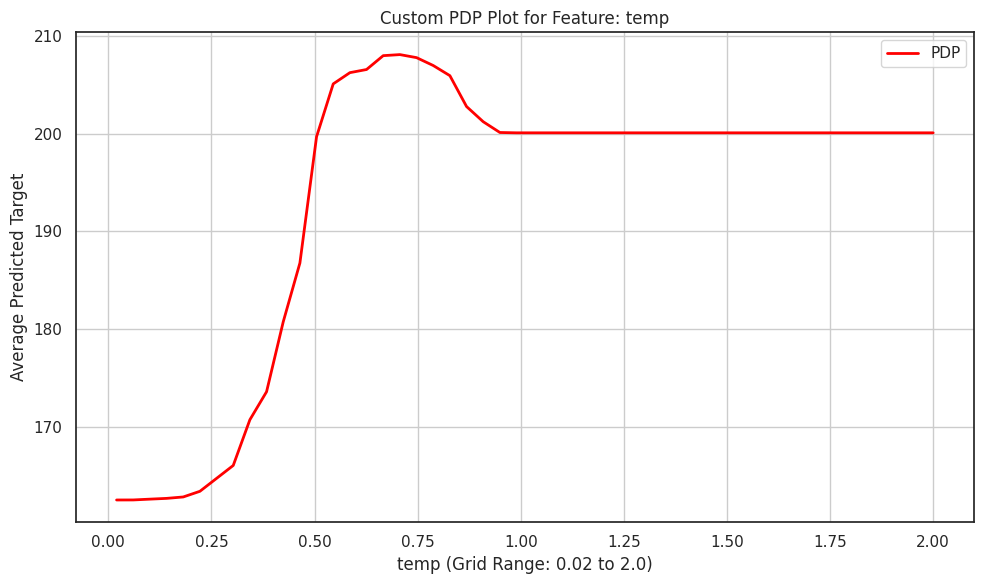

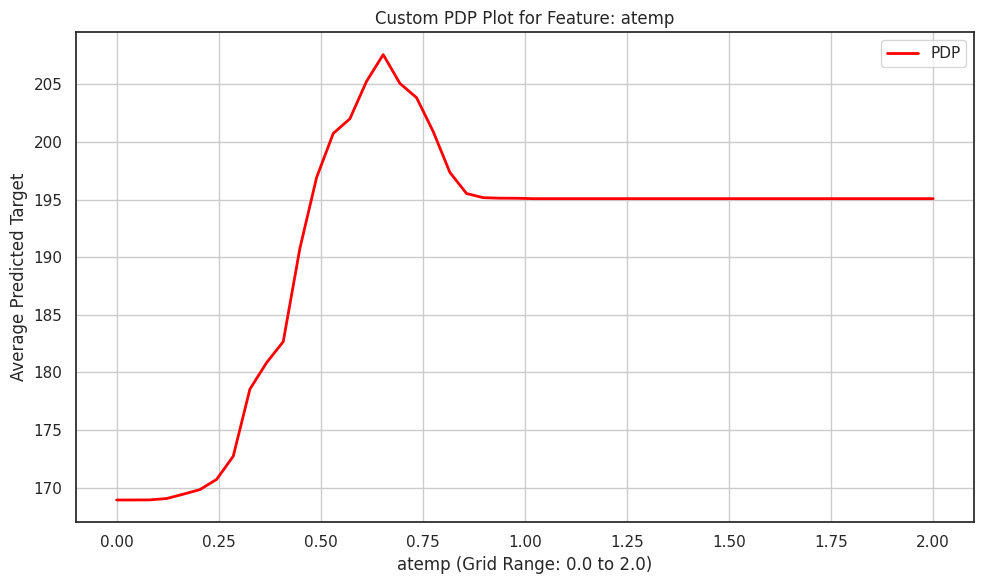

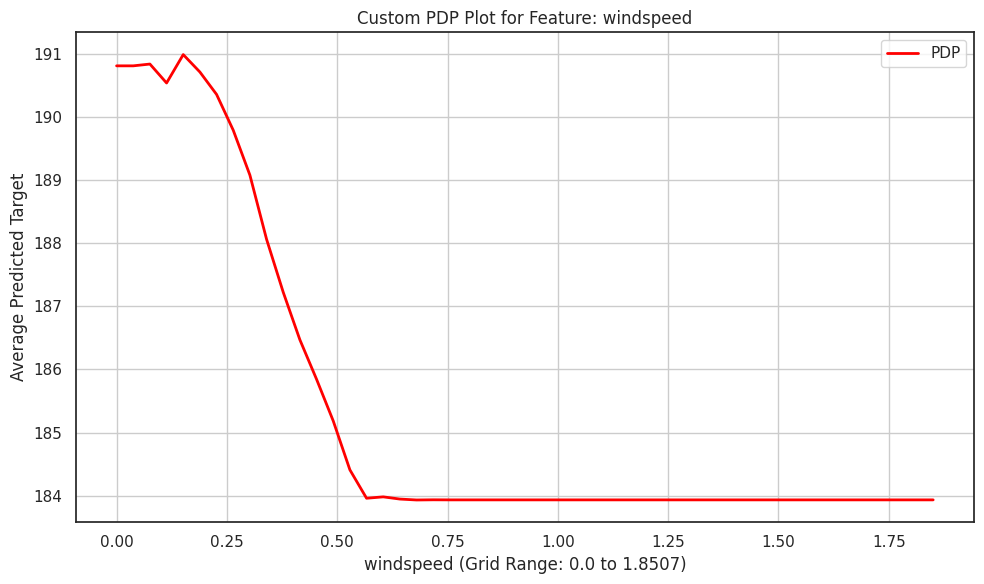

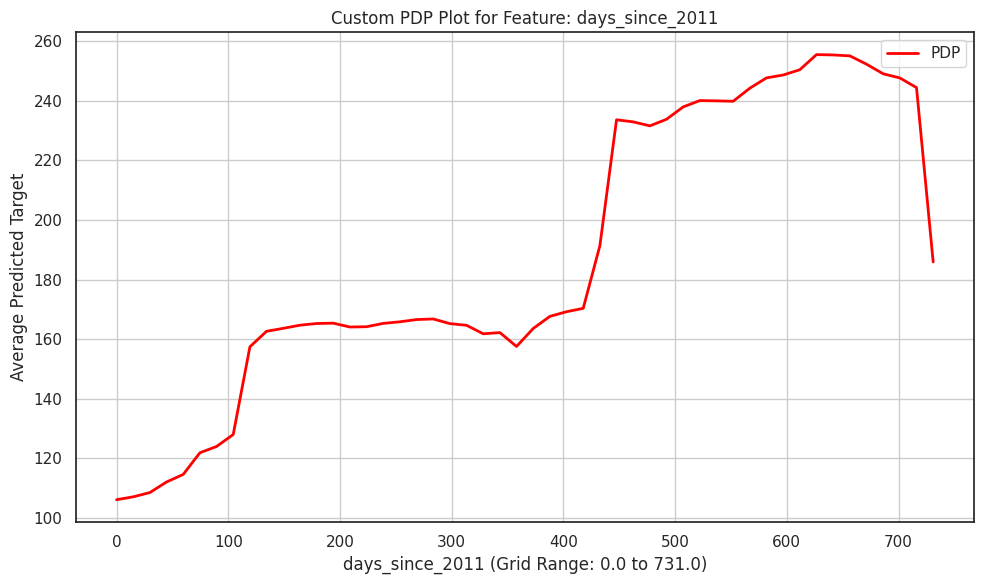

In [23]:
for feature in [8,9,-2,-1]:
    print()
    f_name = X.columns[feature]
    
    # Define unrealistic grid ranges
    grid_range = (X[f_name].min(), X[f_name].max()+1)  # Extend beyond the normalized range

    # Generate custom ICE plot
    custom_pdp_plot(model, X, feature, f_name, grid_range)
    

Looking at the plot would someone really bike the same amount at 25°C (0.5 on our normalized scale) versus 50°C (1.0 on our scale)? Probably not - most people would bike less in extreme heat. Our partial dependence plots show this limitation: they suggest similar rental patterns at comfortable temperatures (around 0.75 or ~35°C) and extreme temperatures (above 1.0 or >45°C), which doesn't match real-world behavior.
The same issue appears with wind speed. The plots show rentals dropping as wind increases up to about 0.75 (moderate winds), but then oddly flatten out for hurricane-level winds! This happens because our model never saw such extreme conditions in training data - no one's biking in a hurricane.
For the time trend, our model learned normal seasonal patterns within our 2011-2012 training data. But ask it to predict rentals for 2013 (beyond 731 days), and it predicts a sharp, unrealistic drop in rentals. It's like asking someone who's only seen DC summers and winters to predict spring weather in Australia.
This is why Local Accumulated Effect plots are often more reliable - they stick to analyzing patterns the model has actually learned from real data, rather than making guesses about extreme scenarios it's never seen.


### Unrealistic Values in Partial Dependence Plots
Partial dependence plots (PDPs) have another key limitation: they can generate predictions for impossible real-world scenarios. Consider our bike-sharing dataset: seasons and months are naturally linked—December is always in winter, August in summer. However, PDPs assume these features are independent, potentially evaluating impossible combinations like "August in winter."
Our custom_pdp_plot visualizes this issue, showing actual data points (marked with x) alongside PDP predictions. The plot reveals where our model makes predictions for season-month combinations that can't exist in reality, highlighting a fundamental weakness of PDPs. We'll explore this limitation further when discussing M-plots. Additionally, PDPs can be affected by feature correlations, though to a lesser extent—we'll examine this in our analytical example where the effect is more subtle.


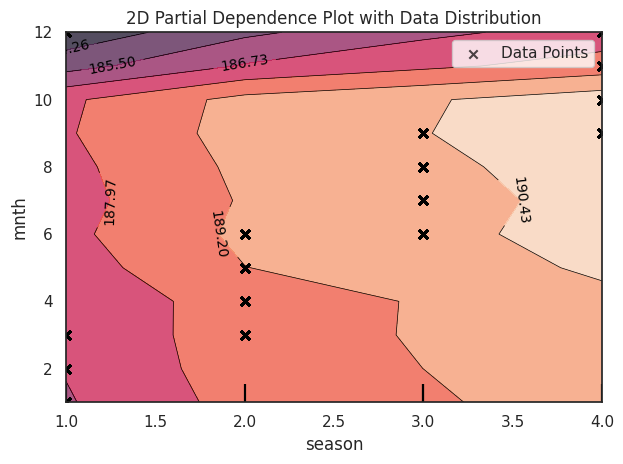

In [24]:
PDP_scatter((0,2),X,model)

## Marginal Plots

Marginal Plots (M-Plots), in this case  used in practice as an intermediate step to Partial Dependence Plots (PDPs), address two key issues: reliance on unrealistic feature combinations and extrapolated predictions. PDPs assume that all features are independent, which can lead to evaluations of unrealistic scenarios. For instance, predicting bike rentals for Winter at 35°C in the bike-sharing dataset is invalid, as such temperatures do not occur in Winter. Similarly, PDPs often evaluate predictions for unobserved data ranges, such as temperatures of 50°C when the training data only includes temperatures up to 25°C.

M-Plots overcome these problems by using the **conditional distribution** of the data, ensuring predictions are only made for realistic feature combinations and observed data ranges. For example, in the bike-sharing dataset, M-Plots for temperature would evaluate its effect within seasonal contexts, such as Summer temperatures (e.g., 20–35°C), avoiding impossible combinations like "August in Winter.


The 2D PDP plot shown evaluates the relationship between season and month and includes data points for reference. While the model predicts reasonable values in regions supported by data (e.g., Summer with July or Winter with December), the presence of extrapolated combinations like "Season 1 (Winter) with Month 8 (August)" demonstrates unrealistic scenarios that would not exist in real-world data. These points are artificially created by the PDP framework and highlight how the independence assumption can lead to nonsensical results.



M-Plots fix these problems by using the **conditional distribution** of the data, ensuring that predictions are only made for realistic feature combinations and observed data ranges. For example, M-Plots for temperature in the bike-sharing dataset would evaluate its effect within seasonal contexts, such as Summer temperatures (e.g., 20–35°C), avoiding impossible combinations like "August in Winter" or extreme, unseen values. This makes M-Plots more practical and reliable than PDPs. 


Let's examine an extreme case that highlights PDPs' limitations: the prediction that summer months like June and July could occur in winter. To understand why this is problematic, we need to review the concept of Conditional Probability Density Function.


### Conditional Probability Density Function (PDF)

The conditional PDF for $X_{-S}$ given $X_S = x_S$ is denoted as $p(X_{-S} \mid X_S = x_S)$. This function describes the probability distribution of the unknown features $X_{-S}$ conditioned on the known feature $X_S$ taking the value $x_S .


The term $p(X_{-S})$ represents the marginal probability, which assumes an equal probability for each season. In this case, $p(X_{-S})=1/12$ for all seasons. Let's visualize this by overlaying two histograms: one showing the uniform distribution where $p(X_{-S})=1/12$, and another showing the conditional probability $p(X_{-S}|X_s)$, which reveals the true relationship between seasons and months.

### Definitions for the Example

- $X_S$: The random variable representing the season (e.g., Winter, Spring, Summer, Fall). T\ext, we will focus on $X_S$ representing all features in the dataset.
- $X_S = x_S$: A fixed season  $X_S =Winter$
- $X_{-S}$: The random variable representing the months observed during a season (e.g., months observed in Winter).  
- $X_{-S} = x_{-S}$: A specific i.e (e.g., $x_{-S} = December$  




We can visualizes the conditional probability density function (PDF) of months ($X_{-S}$) given seasons ($X_S = x_S$) alongside the marginal PDF of months.

For each season (assumed to be labeled as 1 through 4), a subplot is created showing two histograms: the **marginal PDF of months** (red), which represents the overall distribution of $X_{-S}$ without conditioning on $X_S$, and the **conditional PDF of months given the season** (blue), which represents the distribution of $X_{-S}$ restricted to the subset of data where $X_S = x_S$.


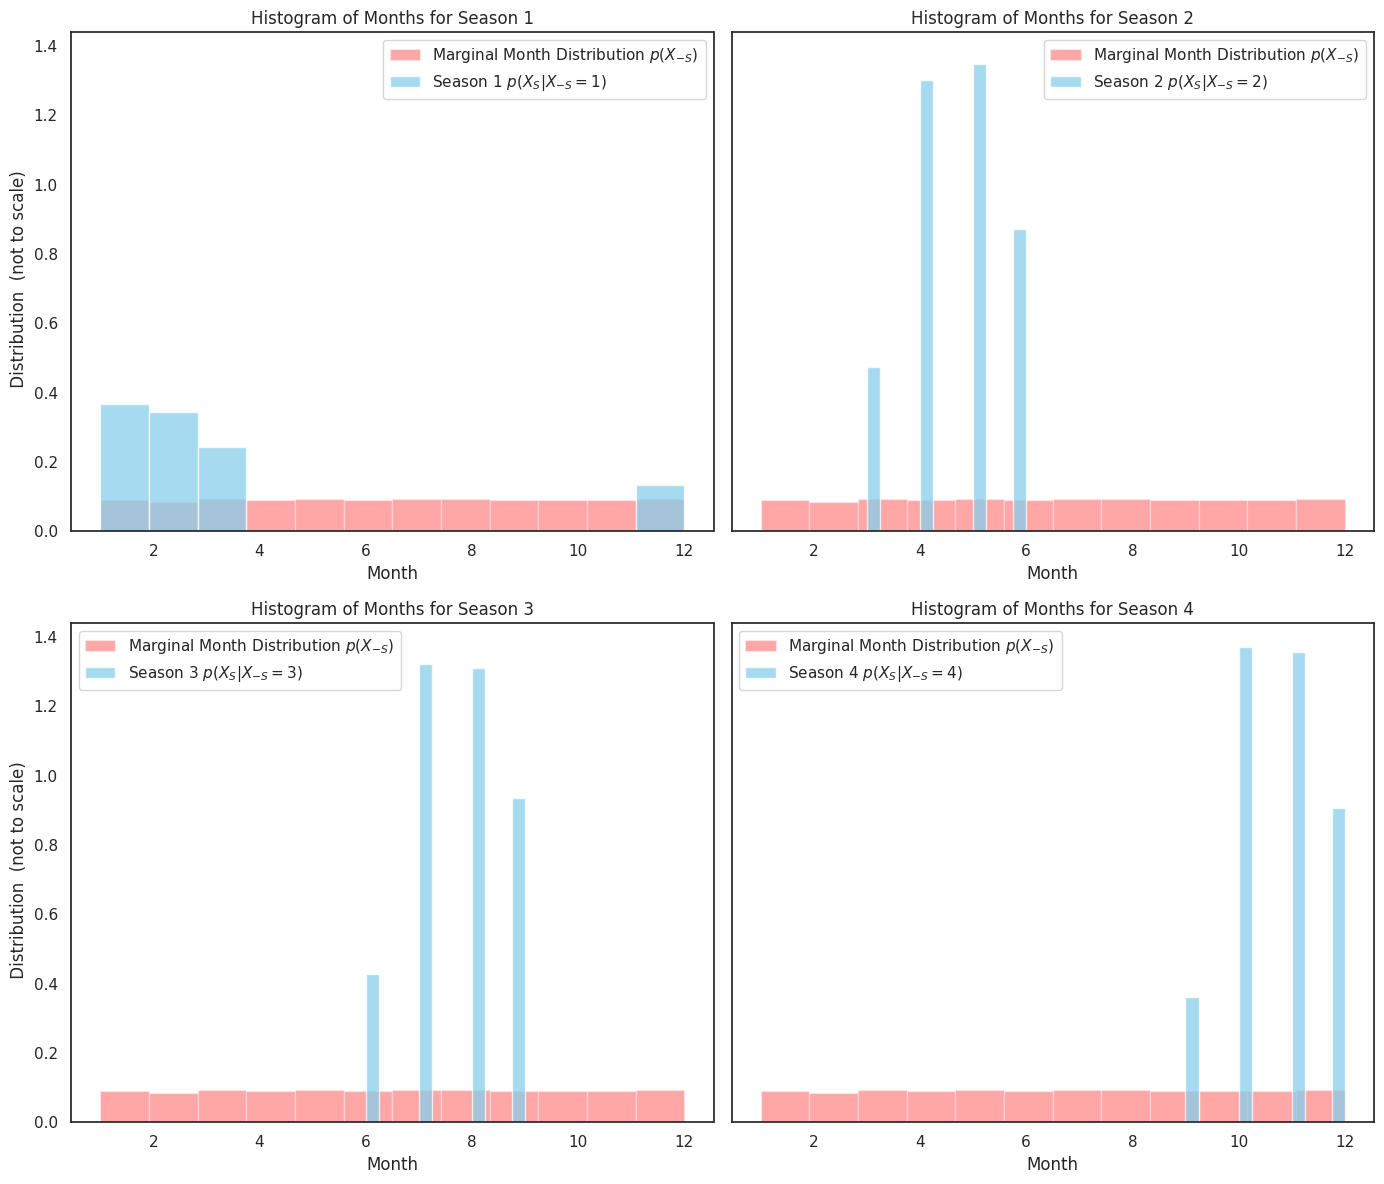

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)

# Iterate over seasons to plot conditioned histograms
for season in range(1, 5):  # Assuming seasons are labeled as 1, 2, 3, 4
    ax = axes[(season - 1) // 2, (season - 1) % 2]
    
    # Conditional histogram for months given this season
    
    # Marginal histogram of months for comparison
    X["mnth"].plot.hist(
        bins=12, alpha=0.35, ax=ax, label=r"Marginal Month Distribution $p(X_{-S})$ ", color="red",density=True)
    X[X["season"] == season]["mnth"].plot.hist(
        bins=12, alpha=0.75, ax=ax, label=fr"Season {season} $p(X_{{S}}|X_{{-S}}={season})$", color="skyblue",density=True)

    
    ax.set_title(f"Histogram of Months for Season {season}")
    ax.set_xlabel("Month")
    ax.set_ylabel(" Distribution  (not to scale)")
    ax.legend()

plt.tight_layout()
plt.show()

For a discrete distribution $P(X_{-S})$, the Partial Dependence Plot (PDP) is defined as the weighted average of the model's predictions over all observed values of $X_{-S}$, given a fixed $X_S = x_S$. While the continuous version of both PDP and marginal plots appears in the appendix, this discrete definition provides valuable insight into why PDPs fail. Note that this should not be confused with Monte Carlo sampling estimation approache

Let’s focus on the second example, where we consider the conditional relationship between months and seasons. Here, $X_S$ represents the **season**, and we will focus on its discrete values:

$X_S$: The random variable representing the season, where:


$X_S \in \{\text{winter}, \text{spring}, \text{summer}, \text{fall}\}$

$x_S$: A specific realized value of $X_S$, such as $x_S = \text{winter}$.

### PDP Equation (Discrete Form)

For a discrete distribution $P(X_{-S})$, the Partial Dependence Plot (PDP) is defined as the weighted average of the model's predictions over all observed values of $X_{-S}$, given a fixed $X_S = x_S$:

$
\hat{f}_{X_S}(x_S) = \sum_{x_{-S} \in X_{-S}} f(x_S, x_{-S}) \cdot P(X_{-S} = x_{-S})
$

Where:
- $\hat{f}_{X_S}(x_S)$: The estimated partial dependence for the feature $X_S$ at value $x_S$.
- $f(x_S, x_{-S})$: The model's prediction for the combination of $X_S = x_S$ and $X_{-S} = x_{-S}$.
- $P(X_{-S} = x_{-S})$: The probability of observing $X_{-S} = x_{-S}$ in the dataset (a discrete probability distribution).


We can see that when we calculate the PDP value for June, we get the following:

$
\hat{f}_{\text{June}} = f(\text{June}, \text{Winter}) \cdot P(\text{Winter}) + f(\text{June}, \text{Spring}) \cdot P(\text{Spring}) + f(\text{June}, \text{Summer}) \cdot P(\text{Summer}) + f(\text{June}, \text{Fall}) \cdot P(\text{Fall})
$

All these weighted values are averaged into the final prediction, do not make any sence:

$
f(\text{June}, \text{Winter}) \cdot P(\text{Winter}), \quad f(\text{June}, \text{Spring}) \cdot P(\text{Spring}), \quad f(\text{June}, \text{Fall}) \cdot P(\text{Fall}).
$






### Marginal Plots (M-Plots)
 M-Plots focus only on values of $X_{-S}$ that are observed in the dataset given $X_S = x_S$. The definition of an M-Plot is:

$$
\hat{f}_{X_S}(x_S) = \sum_{x_{-S} \in N(x_S)} f(x_S, x_{-S}) \cdot P(X_{-S} = x_{-S} \mid X_S = x_S)
$$

Where:
- $N(x_S)$ is the set of values of $X_{-S}$ observed in the dataset when $X_S = x_S$.
- $P(X_{-S} = x_{-S} \mid X_S = x_S)$ is the conditional probability of $X_{-S} = x_{-S}$ given $X_S = x_S$.



### Example: June and Seasons

Using June as a fixed value of $X_S$ (i.e., $x_S = \text{June}$), the M-Plot averages predictions over the observed values of $X_{-S}$ (seasons) conditioned on June. The calculation for the M-Plot would look like this:

$$
\hat{f}_{\text{June}} = f(\text{June}, \text{Summer}) \cdot P(\text{Summer} \mid \text{June}),
$$

since June is only observed in Summer in the dataset. 

In contrast, the PDP calculates predictions by averaging over all seasons, regardless of whether the combinations exist in the data. For June, the PDP equation is:

$$
\hat{f}_{\text{June}}^{\text{PDP}} = f(\text{June}, \text{Winter}) \cdot P(\text{Winter}) + f(\text{June}, \text{Spring}) \cdot P(\text{Spring}) + f(\text{June}, \text{Summer}) \cdot P(\text{Summer}) + f(\text{June}, \text{Fall}) \cdot P(\text{Fall}).
$$

However, for M-Plots, all terms where the conditional probability $P(X_{-S} \mid X_S = x_S)$ is zero are excluded. For example:

$$
f(\text{June}, \text{Winter}) \cdot P(\text{Winter} \mid \text{June}) = 0,
$$
$$
f(\text{June}, \text{Fall}) \cdot P(\text{Fall} \mid \text{June}) = 0,
$$

$$
f(\text{June}, \text{Spring}) \cdot P(\text{Spring} \mid \text{June}) = 0,
$$

since June is not observed in Winter or Fall. This ensures that M-Plots avoid unrealistic combinations, focusing only on the valid relationships observed in the dataset.






For more on continuous M-plots, see the appendix. While we won't delve into the details of M-plots, as they serve as an intermediate step towards generating local accumulated effect plots, they are effectively implemented within the conditional_expectation_plot function, which you can use to generate the plot values.


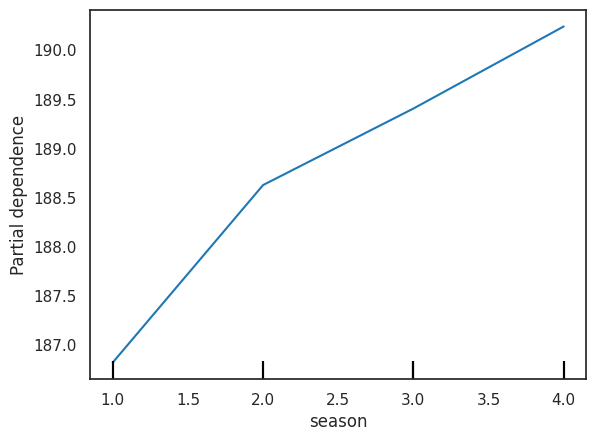

In [26]:
disp= PartialDependenceDisplay.from_estimator(
    model, 
    X, 
    features=[0], 
    grid_resolution=4
)
yhat=model.predict(X)

y_ =conditional_expectation_plot(X, 'season', yhat, bins=4)


The following plot highlights the stark contrast between PDP and M-Plot approaches. While the PDP suggests season has minimal impact on bike rentals, the M-Plot reveals a significantly different pattern. Importantly, these predictions incorporate all features in the dataset ($X_S$), not just averaging over unrealistic season-month combinations, but considering more realistic feature interactions across the entire dataset.


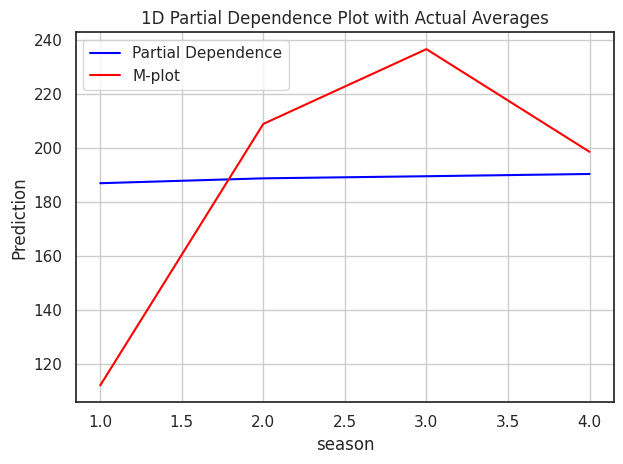

In [27]:
# Plot the PDP line
plt.plot(
    disp.pd_results[0]['grid_values'][0], 
    disp.pd_results[0]['average'][0], 
    label="Partial Dependence", 
    color="blue"
)

# Plot the actual averages as red crosses
plt.plot([1,2,3,4],
    y_['predicted'].to_numpy(), 
    'r', 
    label="M-plot"
)

# Add labels and legend
plt.xlabel("season")
plt.ylabel("Prediction")
plt.title("1D Partial Dependence Plot with Actual Averages")
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()

# Correlated Feature Problem 

In machine learning, correlated features present a fascinating challenge. This challenge becomes particularly evident when we work with Marginal plots (M-plots) and Partial Dependence plots (PD-plots), which attempt to visualize how individual features affect our model's predictions.
Our example examining temperature (temp) and apparent temperature (atemp) perfectly illustrates this challenge through a 2D Partial Dependence Plot. These two features are naturally linked - the temperature people perceive (atemp) typically rises and falls with the actual temperature (temp). The plot reveals this relationship through a clear diagonal pattern of data points, demonstrating how these features move together in real-world scenarios.
This correlation creates two significant problems for interpretation. First, when our model makes predictions, it's difficult to distinguish whether it's responding more to the actual temperature or the perceived temperature since they typically change together. Second, and perhaps more critically, the PD-plot generates predictions for combinations that don't exist in reality. For instance, the plot calculates values for scenarios with low perceived temperature but high actual temperature - combinations that appear in the upper left and bottom right portions of the plot where we see no actual data points. These empty regions in our visualization highlight a fundamental limitation of PD-plots: they generate predictions for feature combinations that are theoretically possible but practically impossible or extremely rare in real-world conditions


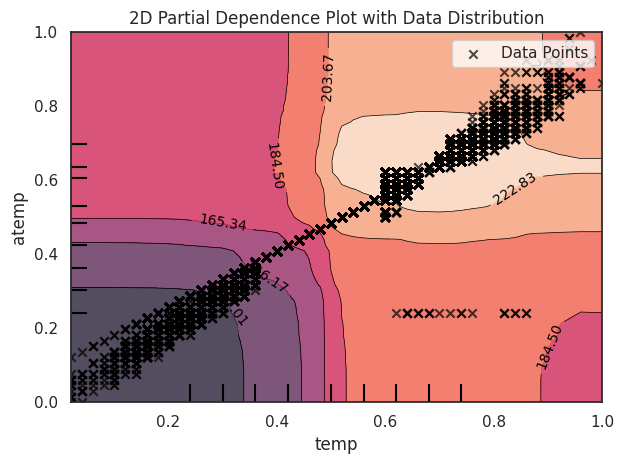

In [28]:
PDP_scatter((8,9),X,model)

Examining the M-Plot of `temp` (temperature) and `atemp` (apparent temperature), we observe that their effects are nearly identical, except for slight deviations at values near one. This raises a critical issue, as it becomes unclear what specifically is causing the observed differences in the model's predictions. `temp` and `atemp` could lead to overlapping or confounding effects, making it difficult to disentangle their individual contributions.


In [29]:
ytemp=conditional_expectation_plot(X, 'temp', yhat, bins=10)
yatemp=conditional_expectation_plot(X, 'atemp', yhat, bins=10)

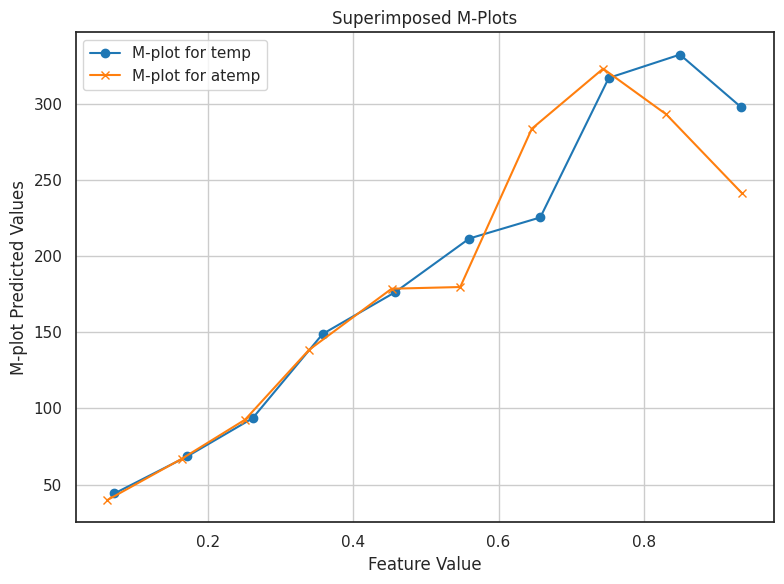

In [30]:
plt.figure(figsize=(8, 6))

# Plot ytemp
plt.plot(
    ytemp['temp'], 
    ytemp['predicted'], 
    label='M-plot for temp', 
    marker='o'
)

# Plot yatemp
plt.plot(
    yatemp['atemp'], 
    yatemp['predicted'], 
    label='M-plot for atemp', 
    marker='x'
)

# Add labels and title
plt.xlabel('Feature Value')
plt.ylabel('M-plot Predicted Values')
plt.title('Superimposed M-Plots')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

Suppose we want to predict bike rentals based on weather conditions. The dataset includes both actual temperature (temp) and "feels like" temperature (atemp) as features. On a warm day with a light breeze, the actual temperature might be 25°C, while the apparent temperature might feel like 23°C due to the breeze. While the model may struggle to distinguish whether slight changes in rentals are due to actual or apparent temperature, correlated features present an even more subtle challenge for M-plots and, to a lesser extent, PDP plots—even with a perfect model. Let's explore this through a simulated example.


### When M-Plots Fail: Misleading Results with Correlated Features


M-Plots aim to show how a feature affects predictions by conditioning on observed data relationships consider the example from [Interpretable Machine Learning (IML)](https://slds-lmu.github.io/iml/).  However, when features are highly correlated, M-Plots can misattribute their effects. This not only makes it hard to separate feature impacts but can also lead to completely wrong predictions, such as incorrect slopes or trends, as the conditioning reflects feature correlation rather than their true, independent contributions.

This example illustrates a regression problem where the target variable $y$ is modeled as a linear combination of two highly correlated features $x_1$ and $x_2$, with added noise:

$$
y = -x_1 + 2x_2 + e
$$

Where:
- $x_1$ and $x_2$: Features with a strong positive correlation ($\text{correlation} = 0.9$).
- $e$: Random noise sampled from a normal distribution $\mathcal{N}(0, 1)$.
- $-x_1$: Negative contribution to $y$ (downward slope).
- $2x_2$: Positive contribution to $y$ (upward slope, twice as strong as $x_1$).

The goal is to understand how the correlation between $x_1$ and $x_2$ influences their individual contributions to $y$.



The code generates two correlated features ($x_1$ and $x_2$), computes the target variable $y$ using the equation above, and visualizes the strong correlation between $x_1$ and $x_2$ using a scatter plot. We then train the  Random Forest Regressor model:


In [31]:
n_samples=100000
correlation=0.9

x1,x2=generate_correlated_data(n_samples, correlation=correlation, random_state=0)
# Noise
e = np.random.normal(0, 1, n_samples)

# Dependent variable
y = -x1 + 2 * x2 + e

# Combine into a DataFrame
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})



X = data[['x1', 'x2']]
y = data['y']

# Train Random Forest Regressor
model = RandomForestRegressor(random_state=0)

model.fit(X, y)
print("R^2",model.score(X,y))
yhat=model.predict(X)


R^2 0.9314796103543055


This plot overlays the **Partial Dependence Plot (PDP)** (blue line) and the **Marginal Plot (M-Plot)** (red dashed line) for the feature $x_1$. The PDP shows the negative effect of $x_1$ on the predictions by averaging over all values of $x_2$. In contrast, the M-Plot incorrectly shows a positive slope for $x_1$. 


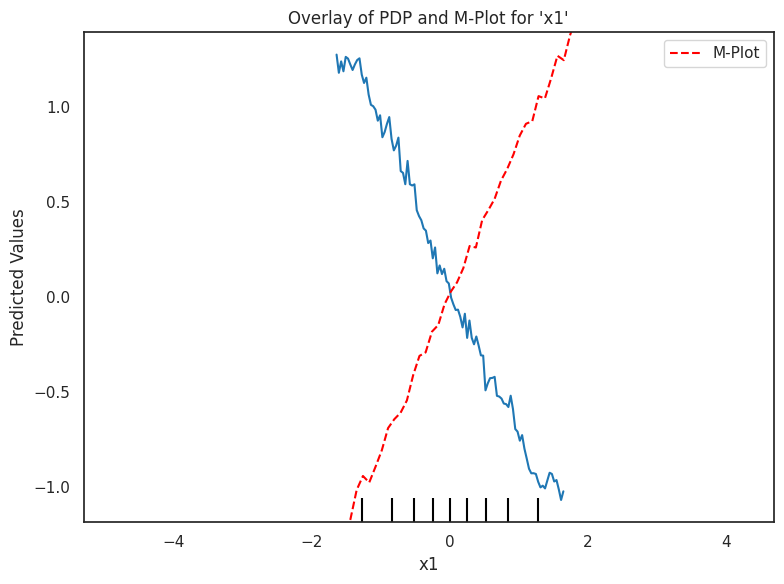

In [32]:
# Generate the PDP and get the display axes
fig, ax = plt.subplots(figsize=(8, 6))
disp = PartialDependenceDisplay.from_estimator(
    model,
    X,
    ['x1'],  # Feature to compute PDP for
    kind='average',
    grid_resolution=100,
    ax=ax  # Use provided axis
)

# Compute the M-Plot data (assuming `conditional_expectation_plot` returns a DataFrame)
m_plot_data = conditional_expectation_plot(data, feature='x1', predicted_values=yhat, bins=100)

# Overlay the M-Plot on the existing axis from the PDP
disp.axes_[0, 0].plot(
    m_plot_data['x1'], m_plot_data['predicted'],
    label='M-Plot', color='red', linestyle='--'
)

# Customize and finalize the plot
disp.axes_[0, 0].set_title("Overlay of PDP and M-Plot for 'x1'")
disp.axes_[0, 0].set_ylabel("Predicted Values")
disp.axes_[0, 0].legend()
plt.tight_layout()
plt.show()


The closed-form expression (see Appendix) for the M-Plot highlights how correlation between features affects the interpretation of feature contributions. It integrates the model's predictions over the conditional distribution of other features, which can distort the interpretation when features are highly correlated. For this regression problem, where $f(x_1, x_2) = -x_1 + 2x_2$ and $X_2$ depends on $X_1$, the M-Plot's function  is:

$$
\hat{f}_{X_1}(x_1) = (-1 + 2\rho)x_1,
$$

where $ \rho $ is the correlation between $X_1$ and $X_2$. The term $2\rho$ arises from the correlation between $X_2$ and $X_1$: as $x_1$ changes, these changes are reflected in $x_2$. Examining the table below demonstrates how different correlation values influence the M-Plot function:

| Correlation ($\rho$) | Effective Slope ($-1 + 2\rho$) |
|-----------------------|-------------------------------|
| 0                     | $-x_1$                       |
| 0.5                   | $0$                          |
| 1                     | $x_1$                        |



When the correlation is zero ($\rho = 0$), the value for $x_1$ is negative, reflecting its true negative contribution. If $\rho = 0.5$, the slope becomes $0$, meaning $x_1$ has no effect. When $\rho = 1$, $x_1$ appears to have a positive effect, even though its true contribution is negative. This illustrates how high correlation distorts the interpretation of feature contributions in M-Plots.




## Why we need Local  Accumulated Local Effects (ALE)


 Accumulated Local Effects (ALE)  plots address key limitations of both PDPs and M-plots when dealing with correlated features. While PDPs and Marginal plots can produce misleading results by generating predictions for unrealistic data combinations or failing to account for feature correlations, LAE plots offer a more reliable alternative.
The fundamental innovation of LAE plots lies in their approach to handling feature dependencies. Instead of averaging over potentially impossible feature combinations (as PDPs do) or ignoring correlations entirely (as Marginal plots do), LAE plots accumulate local changes in predictions along the feature of interest. This accumulation is performed in a way that respects the underlying data distribution and feature correlations.  They are alos much faster then PDP plots essputaly for lagrd dataset.


The following  equation  demonstrates why we need LAE plots by combining three key elements that challenge traditional visualization methods: linear terms, an interaction effect, and correlated features.

$$y = x_1 -2 x_2 -x_1x_2+e$$





In [33]:

# Dependent variable
y = x1 -2* x2 -x1*x2+e
data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data 

,x1,x2,y
0,1.764052,1.376765,-3.378652
1,0.400157,0.921593,-1.473432
2,0.978738,0.824251,-2.318674
3,2.240893,1.930464,-5.995629
4,1.867558,1.535002,-5.299398
...,...,...,...
99995,-0.337715,-0.185456,0.262762
99996,-2.028548,-1.803678,-1.421573
99997,0.726182,0.944658,-1.554349
99998,-1.167831,-1.496176,2.195867


In [34]:
X = data[['x1', 'x2']]
y = data['y']

# Train Random Forest Regressor
model = RandomForestRegressor(random_state=0)
model.fit(X, y)
yhat=model.predict(X)

Looking at this visualization of the predictions, we can see the predicted values across different combinations of $x_1$ and $x_2$. The black X marks show our actual data points, which form a clear diagonal pattern from bottom-left to top-right, indicating strong positive correlation between x1 and x2.
Notice the empty spaces in the top-left and bottom-right corners - we have no data points there because these combinations of $x_1$ and $x_2$ don't occur in our dataset. This makes sense given their correlation - high values of $x_1$ tend to occur with high values of $x_2$, and low values of $x_1$ with low values of $x_2$.
The color gradient shows how our predictions change: yellower areas indicate higher predicted values, while darker purple shows lower values. 
Due to the interaction term $-x_1x_2 $in our equation, increasing $x_1$ has different effects depending on the value of $x_2$. For positive $x_2$ values (upper half), increasing $x_1$ leads to lower predictions, while for negative x2 values (lower half), increasing $x1$ leads to higher predictions.


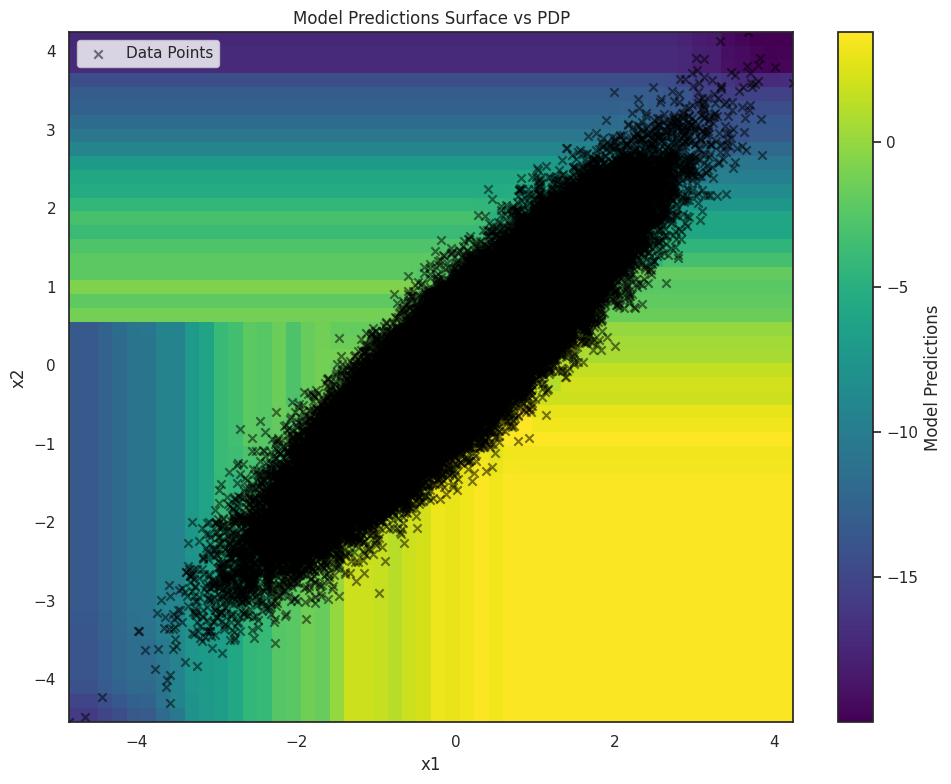

In [35]:
plot_predicted_surface(X, model)

When $x_1$ and $x_2$ have means of zero and zero correlation, the PDP for $x_1$ is simply:
$$
\hat{f}_{X_1}(x_1) = x_1
$$
However, when correlation exists between features, this clean relationship breaks down. The PDP averages over the marginal distribution of $x_2$, but correlation creates a complex interaction between $x_1$ and $x_2$ in the model's predictions. This leads to a mismatch between what we'd theoretically expect and what the PDP actually shows, highlighting how feature correlations can distort PDP interpretations as shown if the following plot. Try setting the corelation to a lower value and see what happens.







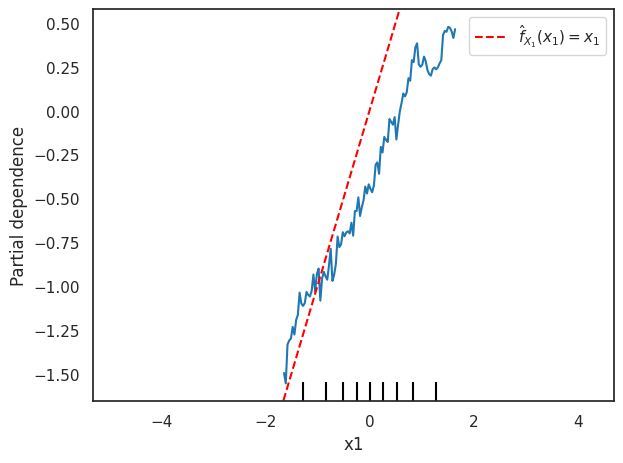

In [36]:
x1_values = np.linspace(X['x1'].min(), X['x1'].max(), 100)  # Generate x1 values
y_values = x1_values  # Since f_hat(X1) = x1 when E[x2] = 0

# Plot the predicted surface


# Add the Partial Dependence Display
disp = PartialDependenceDisplay.from_estimator(
    model,
    X,
    ['x1'],  # Features to compute PDP for
    kind='average',
    grid_resolution=100
)

# Overlay the line for f_hat(X1) = X1
plt.plot(x1_values, y_values, label=r"$\hat{f}_{X_1}(x_1) = x_1$", color="red", linestyle="--")

# Finalize the plot
plt.legend()
plt.tight_layout()
plt.show()


The correlation between $x_1$ and $x_2$ has a significant effect on the marginal plot (M-plot). When we plot the M-plot, we observe that the slope is negative as $x_1$  is negative:


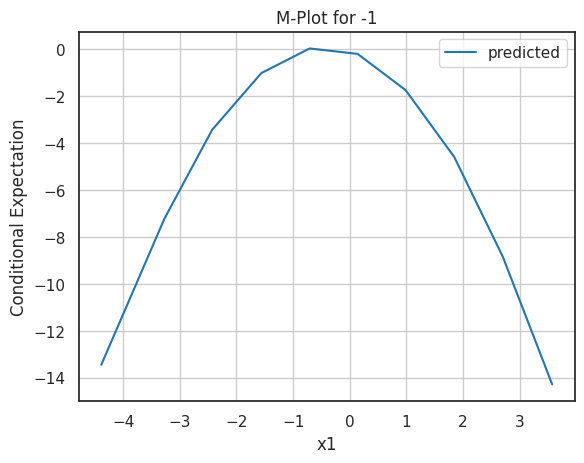

In [37]:
conditional_expectation_plot(data, feature='x1', predicted_values=yhat, bins=10).plot(x='x1',y='predicted')
plt.ylabel("Conditional Expectation")
plt.title(f"M-Plot for {feature}")
plt.legend()
plt.grid(True)

PDP, this behavior is inherent to the mechanics of the system and not an artifact of the data distribution. One key observation is that the marginal plot is dominated by the $x_1^2$ term, which grows quadratically as $x_1$ increases. As a result, the M-plot decreases as $x_1$ becomes larger. This is because the correlation amplifies the influence of the interaction between $x_1$ and $x_2$, resulting in a nonlinear relationship.


For the function $x_1 - x_2 - x_1x_2$, assuming $x_1$ and $x_2$ are jointly Gaussian with zero means, standardized variances ($\sigma_1 = \sigma_2 = 1$), and correlation $\rho$, the marginal plot is given by:

$$
\hat{f}_M(x_1) = x_1 (1 - \rho) - \rho x_1^2
$$

see Appendix for how to get this term.


#  Estimation of Accumulated Local Effects (ALE) Plot Equation

ALE plot unlike the Partial Dependence Plot (PDP), the numerical version of ALE is quite complex to implement. Similarly, unlike the Marginal Plot, the continuous version is challenging to interpret see Appendix . Let’s break down the Estimation to provide insight into how it works:

$$
\text{ALE}_S(x) = \sum_{k=1}^{K(x)} \frac{1}{n_S(k)} \sum_{i : x_S^{(i)} \in N_S(k)} 
\left[ \hat{f}(z_{k,S}, x_{-S}^{(i)}) - \hat{f}(z_{k-1,S}, x_{-S}^{(i)}) \right]
$$

This quite complicated so we will break it down 

![Screenshot 2025-01-19 at 3.03.37 PM.png](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/AlVejFhZtptvdcnY2wQJSQ/Screenshot%202025-01-19%20at%203-03-37%E2%80%AFPM.png)






First  $N_S(k) $ represents the **set of data points** for which the selected feature $ S $ falls within the $ k $-th bin. Here $x_1$ will be $S1$. Its a set 
$$
  N_S(k) = \{ x^{(i)} : z_{k-1,S} \leq x_S^{(i)} < z_{k,S} \}
  $$
where:
  - $ z_{k-1,S} $ and $ z_{k,S} $ are the lower and upper boundaries of the \( k \)-th bin, respectively.
  - $ x_S^{(i)} $is the value of the feature $S $ for the $i-th$ data point.


Let  $ \mathbf{X} $ be a dataset with two features:


| **Data Point $ i $** | **$ \mathbf{(x)_1} $ (Feature 1)** | **$ \mathbf{(x)_2} $ (Feature 2)** |
|--------------------------|------------------------------------|------------------------------------|
| **$ \mathbf{x_1} $**     | $ -3.5 $                         | $ -2.2 $                         |
| **$ \mathbf{x_2} $**     | $ -1.1 $                         | $  0.0 $                         |
| **$ \mathbf{x_3} $**     | $  0.8 $                         | $  1.5 $                         |
| **$ \mathbf{x_4} $**     | $  2.7 $                         | $  3.2 $                         |
| **$ \mathbf{x_5} $**     | $  3.8 $                         | $  4.0 $                         |


### Binning Feature $(x)_1$

Let’s define bins for the feature $(x)_1$ with ranges from $[-4, 4]$, dividing every two points:

$
z_{0,1} = -4
$

$
z_{1,1} = -2
$

$
z_{2,1} = 0
$

$
z_{3,1} = 2
$

$
z_{4,1} = 4
$

We assign data points $i$ to bins based on their first feature value $(x)_1$. For the first bin $k = 1$, any sample with $-4 \leq (x)_1 < -2$ is included. For example, the first sample $(\mathbf{x_1})_1 = -3.5$. The entire vector $(\mathbf{x_1})$ is part of the set. Therefore, for the first bin $N_S(1)$, we have:

$
N_S(1) = \{ \mathbf{x_1} \}
$

For the next bin, we compute as follows. For $k = 2$, we know that $-2 \leq (x)_1 < 0$, therefore:

$
N_S(2) = \{ \mathbf{x_2} \} 
$

The other sets are as follows:

$
N_S(3) = \{ \mathbf{x_3} \} 
$

$
N_S(4) = \{ \mathbf{x_4}, \mathbf{x_5} \} 
$

The follwing code relates to $ N_S(k) $ by defining the bins (intervals) and assigning data points to them. Each bin created by `pd.cut` corresponds to a specific $ k -th$  bin in $ N_S(k) $,`bins=n_bins`: Specifies the number of evenly spaced bins to divide the range of `x1` into.


In [38]:
# Bin feature x1
n_bins = 10
bins = np.linspace(x1.min(), x1.max(), n_bins + 1)
N=pd.cut(data['x1'] ,bins=bins, include_lowest=True)
data['N'] = N
data['N']

0          (1.514, 2.423]
1         (-0.305, 0.604]
2          (0.604, 1.514]
3          (1.514, 2.423]
4          (1.514, 2.423]
               ...       
99995    (-1.215, -0.305]
99996    (-2.124, -1.215]
99997      (0.604, 1.514]
99998    (-1.215, -0.305]
99999    (-2.124, -1.215]
Name: N, Length: 100000, dtype: category
Categories (10, interval[float64, right]): [(-4.853000000000001, -3.943] < (-3.943, -3.033] < (-3.033, -2.124] < (-2.124, -1.215] ... (0.604, 1.514] < (1.514, 2.423] < (2.423, 3.332] < (3.332, 4.242]]

By dividing the data into groups, we can see that the correlation within each group is much smaller than in the overall dataset.


In [39]:
data[['x1','x2','N']].groupby('N').corr()

x1        x2
N                                                  
(-4.853000000000001, -3.943] x1  1.000000  0.983405
                             x2  0.983405  1.000000
(-3.943, -3.033]             x1  1.000000  0.466163
                             x2  0.466163  1.000000
(-3.033, -2.124]             x1  1.000000  0.419738
                             x2  0.419738  1.000000
(-2.124, -1.215]             x1  1.000000  0.461312
                             x2  0.461312  1.000000
(-1.215, -0.305]             x1  1.000000  0.474179
                             x2  0.474179  1.000000
(-0.305, 0.604]              x1  1.000000  0.466191
                             x2  0.466191  1.000000
(0.604, 1.514]               x1  1.000000  0.458756
                             x2  0.458756  1.000000
(1.514, 2.423]               x1  1.000000  0.458194
                             x2  0.458194  1.000000
(2.423, 3.332]               x1  1.000000  0.459961
                             x2  0.459961  1.000000
(3.332, 4.242]               x1  1.000000  0.421533
                             x2  0.421533  1.000000

The $Z $ value is the flattened list of left ($ Z_l $ and right (\( Z_r \)) boundaries of bins created by `pd.cut` i.e flattened list of left boundaries  are defined as follows:

$ z_{0,1}< z_{1,1},<z_{2,1}..$


In [40]:
#we can obtain the values of z

Z=sum([[left, right] for left, right in zip(N.cat.categories.left,N.cat.categories.right)],[])
Z[0:3]

[-4.853000000000001, -3.943, -3.943]

The samples that fall within each bin $z_l, z_r$  correspond to $ N_k $. The vertical lines are plotted in order corspond to  $z_1 < z_2 < \dots < z_k $ with $z_1$ , $z_2$.


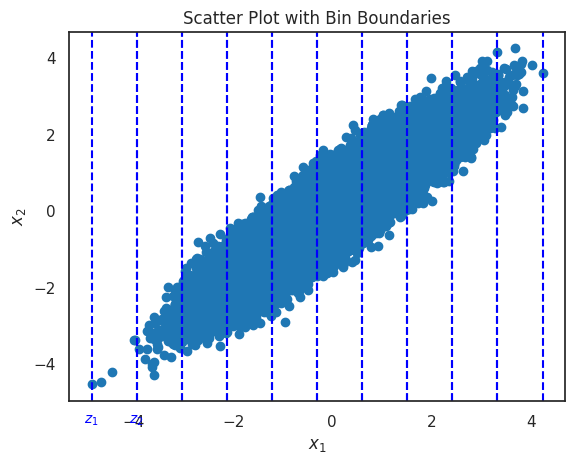

In [41]:
plt.plot(x1, x2, 'o')

for i, z in enumerate(Z):
    plt.axvline(x=z, color='b', linestyle='--')  # Vertical lines
    if i in {0,1}:### General Explanation of ALE Term

        plt.text(z, min(x2) - 1.0, f'$z_{{{i+1}}}$', color='b', fontsize=10, ha='center')  # Add labels above the lines

# Show the plot
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatter Plot with Bin Boundaries')
plt.show()


## Fast ALE Plots


The PDP plot generates $ x_s $, which represents a range of points depending on your chosen grid resolution. This range can be quite large, potentially leading to computational inefficiencies. In contrast, the local ALE plot uses ranges defined by $ z_1 < z_2 < \dots < z_k $, where $z_1 $ and $ z_k $ correspond to the bin boundaries. Typically, the number of bins ($ k $) is much smaller, making the ALE plot computationally faster and more efficient.


### Marginal Effects

The Accumulated Local Effects (ALE) term isolates the marginal effect of a selected feature $ S $ (e.g., $ x_1 $) by computing how the model output changes as $ x_1 $ varies across its bins, while averaging out the influence of other features, such as $ x_2 $ (or multiple features in general). This is achieved by taking the difference in model predictions between two consecutive bin boundaries, $ z_{k-1,S} $ and $ z_{k,S} $, while holding the remaining features $ x_{-S} $ constant. 

The average marginal effect term is given by:
$$
h(k) = \frac{1}{n_S(k)} \sum_{i : x_S^{(i)} \in N_S(k)} 
\left[ \hat{f}(z_{k,S}, x_{-S}^{(i)}) - \hat{f}(z_{k-1,S}, x_{-S}^{(i)}) \right]
$$
 
Where $n_S(k)$ is the number of data points in the  falling within the range of  $N_S(k)$.

The marginal effect term:
$$
\hat{f}(z_{k,S}, x_{-S}^{(i)}) - \hat{f}(z_{k-1,S}, x_{-S}^{(i)})
$$
is one of the most important components of ALE. Let's explore a few intuitive examples to understand this better.



#### Ice Cream Sales Example

Imagine predicting ice cream sales based on temperature ($ x_1 $) and humidity ($ x_2 $):
- Even though temperature and humidity are correlated (hot days are often humid), ALE isolates temperature's effect by looking at small changes:
  - When temperature goes from 75°F to 76°F, sales typically increase by 10.
  - When temperature goes from 76°F to 77°F, sales typically increase by 8.
- These local changes aren't heavily influenced by humidity, allowing ALE to focus on the effect of temperature.



#### House Price Example

Predicting house prices based on square footage ($ x_1 $) and number of bedrooms ($ x_2 $):
- These features are naturally correlated (bigger homes often have more bedrooms).
- ALE looks at local changes in square footage, averaging out the influence of bedrooms:
  - For 2-bedroom houses, going from 1000 to 1100 sq ft increases price by 5000.
  - For 3-bedroom houses, going from 1000 to 1100 sq ft increases price by 5200.
- By averaging these effects, ALE isolates square footage's impact.




$


In [42]:
marginal_effects =[]
# Compute Local Effects
differences = []
n_k_list = []  # Store the number of samples per bin
threshold = 1 # Minimum number of samples per bin

for x_i in data.groupby('N')[['x1', 'x2']]:
    z_l, z_r = x_i[0].left, x_i[0].right  # Bin boundaries
    x_l = x_i[1].copy()
    x_r = x_i[1].copy()

    n_k = x_l.shape[0]  # Number of samples in the bin
    n_k_list.append(n_k)

    # Set feature x1 to bin boundaries
    x_l['x1'] = z_l
    x_r['x1'] = z_r

    # Compute the difference in predictions
    diff = (model.predict(x_r.to_numpy()) - model.predict(x_l.to_numpy())) / n_k
    marginal_effects.append(diff)
    differences.append(diff.mean())  # Store the mean local effect




After computing the marginal effect for each bin, the ALE value for a feature $ S $ (e.g., $ x_1 $) is calculated as the cumulative sum over all bins:

$$
\text{ALE}_S(x) = \sum_{k=1}^{K(x)} h(z_k),
$$

where:
- $h(z_k)$: The marginal effect for the \( k \)-th bin.
- $K(x) $: The total number of bins for the feature \( S \).

In Python, you can calculate the cumulative sum using `np.cumsum` from NumPy. 

When you plot the ALE for $ x_1 $, you might notice that as $ x_1$ increases, its effect is influenced by interactions like $ -x_1x_2 $. This can result in a decreasing trend in the plot, as the interaction term $-x_1x_2 $ dampens the contribution of $ x_1 $For more details, check out the section on the **continuous version**, which dives deeper into this behavior.

It’s also good to know that many libraries use techniques to make ALE plots more reliable and easy to interpret. These include:
- Better binning methods, like quantile-based binning, to handle uneven data distributions.
- Smoothing to reduce noise in the plots.
- Centering the plots so they’re easier to understand by showing the effect relative to the average.

These tweaks help ensure ALE plots give a clear and accurate picture of feature effects.



In [43]:
ale_values  = np.cumsum(differences)

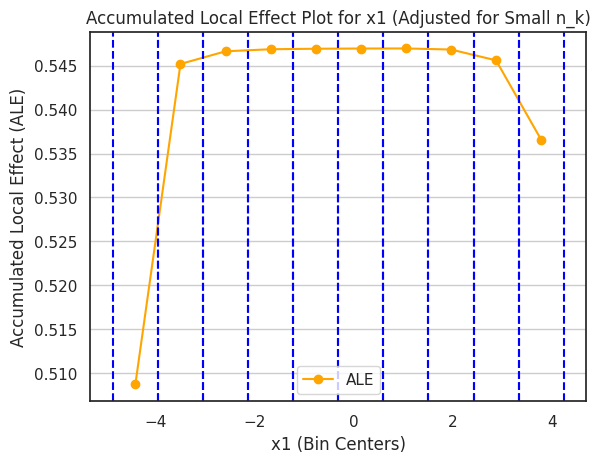

In [44]:
bin_centers = np.array([(interval.left + interval.right) / 2 for interval in data['N'].cat.categories])

#plt.figure(figsize=(10, 6))
plt.plot(bin_centers, ale_values, marker='o', label="ALE", color='orange')
for i, z in enumerate(Z):
    plt.axvline(x=z, color='b', linestyle='--')  # Vertical lines




plt.xlabel("x1 (Bin Centers)")
plt.ylabel("Accumulated Local Effect (ALE)")
plt.title("Accumulated Local Effect Plot for x1 (Adjusted for Small n_k)")
plt.grid(axis='y')
plt.legend()
plt.show()


# Alibi for  Accumulated Local Effects 


Scikit-learn doesn't include ALE plots in its library. While it offers other interpretation tools like partial dependence plots, it lacks ALE plot functionality.
Alibi fills this gap by providing comprehensive model interpretation tools, including ALE plots.
This imports two key components from Alibi:
- **ALE**: A class that computes Accumulated Local Effects (ALE), showing how features influence model predictions across their ranges.
- **plot_ale**: A function that visualizes ALE results through clear and interpretable plots, highlighting feature impacts on predictions.



In [45]:
from alibi.explainers import ALE, plot_ale



This constructor sets up an ```ALE``` explainer to help you understand your model better. Here’s what the parameters do:

- **`predictor`**: The function your model uses to make predictions.  
- **`feature_names`**: A list of features you want to analyze (e.g., `['x1', 'x2']`).  
- **`target_names`**: The name(s) of the target(s) your model predicts.

With this setup, the explainer calculates how each feature impacts the model's predictions and helps you visualize those effects.









In [46]:
# Create ALE explainer
rf_ale = ALE(predictor=model.predict, feature_names=['x1', 'x2'], target_names=['y'])
rf_ale 

ALE(meta={
  'name': 'ALE',
  'type': ['blackbox'],
  'explanations': ['global'],
  'params': {
              'check_feature_resolution': True,
              'low_resolution_threshold': 10,
              'extrapolate_constant': True,
              'extrapolate_constant_perc': 10.0,
              'extrapolate_constant_min': 0.1}
            ,
  'version': '0.9.6'}
)

We run the ALE explainer on your dataset:
- **`rf_ale`**: The ALE explainer you set up earlier.  
- **`explain`**: The method that calculates the accumulated local effects.  
- **`X.to_numpy()`**: Converts your dataset `X` into a NumPy array for the explainer to process.

Running this generates insights into how each feature influences your model's predictions based on the data in `X`


In [47]:
rf_exp = rf_ale.explain(X.to_numpy())




Finally, we plot the effects using the following components:

- **`plot_ale`**: A function to generate ALE effect plots.  
- **`rf_exp`**: The explained effects computed by the ALE explainer.  
- **`features=['x1', 'x2']`**: Specifies which features to include in the plot.

The general shape of the plot is similar to the one we implemented manually, but ALE uses a much more refined methodology. For more details, refer to the [ALE explainer](https://docs.seldon.io/projects/alibi/en/latest/api/alibi.explainers.html).


array([[<Axes: xlabel='x1', ylabel='ALE'>,
        <Axes: xlabel='x2', ylabel='ALE'>]], dtype=object)

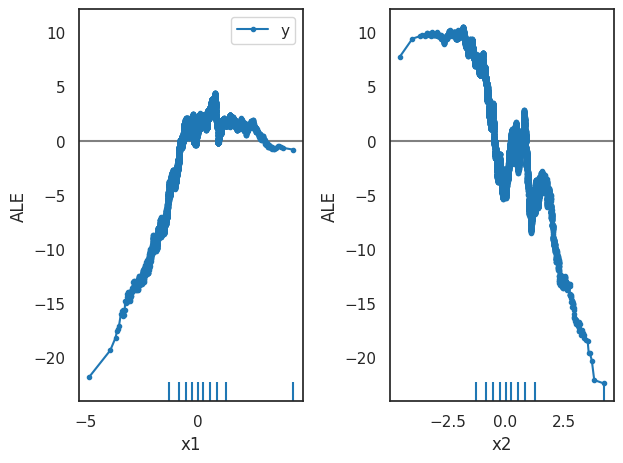

In [48]:

# Plot ALE for 'x1'
plot_ale(rf_exp, features=['x1','x2'])

we can plot for several differt cases  paramter value 


In [ ]:
# Example 2: Increasing the Number of Bins
explainer = ALE(model.predict,  feature_names=['x_ 1', 'x_2'], low_resolution_threshold=1)
ale_result = explainer.explain(X.to_numpy())
plot_ale(ale_result)

### Exploring ALE and PDP on the Bike Sharing Dataset
LetsAccumulated Local Effects (ALE) plot to analyze the impact of key features on predictions in the bike-sharing dataset,will retrain the model. 


In [ ]:
# Extract features and target
X = bike_sharing.data.features
y = bike_sharing.data.targets
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)



In [ ]:
feature_names=list(X.columns)
rf_ale = ALE(predictor=model.predict, feature_names=feature_names, target_names=[ 'bikes'])
rf_exp = rf_ale.explain(X.to_numpy())


The plots above compare the ALE and PDP for the features temp, atemp and 'season' in the bike-sharing dataset.

For both features, the ALE plot shows a decrease in prediction values at the extremes (low and high values), while the PDP remains more constant, especially in regions with less data. This decrease in prediction makes intuitive sense, as people are less likely to ride bikes in extreme temperatures. The scatter plots help visualize this by showing fewer data points at temperature extremes, which aligns with real-world behavior - there are simply fewer extremely hot or cold days in the dataset because they are rare occurrences. By examining the scatter plots below the ALE plots, it becomes clear that there are fewer data points in these regions. 

The effect of feature correlations is less evident, but we see temp and atemp do not directly overlap, and we see for season the ALE plot shows a more constant value for spring and summer. It should be noted that most of the time, ALE and PDP plots are similar in shape and insights, but again ALE plots are much faster to calculate.



In [ ]:
for feature_name in [ 'temp', 'atemp', 'season']:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot ALE
    
    plot_ale(rf_exp, features=[feature_name], ax=ax, line_kw={"color": "blue", "label": "ALE"})
    
    # Plot PDP

    # Make PDP line visible
    
    # Add scatter plot
    ax2 = ax.twinx()
    ax2.scatter(X[feature_name], [0] * len(X), alpha=0.1, s=1, color='gray')
    ax2.set_yticks([])
    
    ax.legend()
    ax.set_title(f"ALE and PDP for {feature_name}")
    plt.tight_layout()
    plt.show()

    fig, ax_pdp = plt.subplots(figsize=(10, 6))




    pdp = PartialDependenceDisplay.from_estimator(model, X_test, [feature_name],kind='average', grid_resolution=100, centered=True,ax=ax_pdp,line_kw={"color": "red", "label": "PDP"})
    pdp.lines_[0][0].set_visible(True) 
    ax2_pdp = ax_pdp.twinx()
    ax2_pdp.scatter(X[feature_name], [0] * len(X), alpha=0.1, s=1, color='gray')
    ax2_pdp.set_yticks([])
    
    ax2_pdp.legend()
    ax2_pdp.set_title(f"ALE and PDP for {feature_name}")
    plt.tight_layout()
    plt.show()


In [ ]:
## Authors


In [ ]:
## Authors


# Mathematical Foundation of the Contiuse ALE PDP D-Plot

This document provides an explanation of the mathematical concepts behind the Contiuse Accumulated Local Effect (ALE), Partial Dependence Plot (PDP) D-plot, used in machine learning interpretability. The Contiuse version is particularly important for theoretical aspects to understand the nuanced relationships captured by these methods. This is most important for correlation as the relationships can be lost in the sampling version.

For illustration, we will use a two-feature example where:
- The joint distribution of the features $X_1$ and $X_2$ follows a zero-mean, correlated Gaussian distribution:

$$
P(X_1, X_2) \sim \mathcal{N}(\mathbf{0}, \mathbf{\Sigma}),
$$

where the covariance matrix $\mathbf{\Sigma}$ is defined as:

$$
\mathbf{\Sigma} =
\begin{bmatrix}
1 & \rho \\\\\\\\\\
\rho & 1
\end{bmatrix},
$$

and $\rho$ represents the correlation coefficient between $X_1$ and $X_2$.

- The **conditional distribution** of $X_1$ given $X_2$ is:

$$
P(X_1 | X_2) \sim \mathcal{N}(\mu_{X_1|X_2}, \sigma_{X_1|X_2}^2),
$$

with:
$$
\mu_{X_1|X_2} = \rho \cdot X_2, \quad \sigma_{X_1|X_2}^2 = 1 - \rho^2.
$$




## 1. Partial Dependence Plot (PDP)

The Partial Dependence Plot (PDP) is a global interpretability tool that shows the average effect of one or more features on the predicted outcome of a model. For a set of features $X_S$, the partial dependence is defined as:



The Partial Dependence Plot (PDP) assumes that the features of interest ($X_S$) are independent of the complement features ($X_{-S}$). This assumption simplifies the joint distribution $P(X)$ into $P(X_S) \cdot P(X_{-S})$, allowing the integration over $X_{-S}$ to represent the average effect of $X_S$ on the model prediction. However, this assumption may not hold in real-world datasets where features are often correlated, potentially introducing inaccuracies in the interpretation.
    
$$
\hat{f}_{X_S}(x_S) = \mathbb{E}_{X_{-S}}[\hat{f}(x_S, X_{-S})] = \int \hat{f}(x_S, X_{-S}) \, dP(X_{-S}),
$$

where:
- $\hat{f}$ is the model's prediction function.
- $X_{-S}$ represents all features except $X_S$.
- $x_S$ is the feature of interest.
- $P(X_{-S})$ is the joint distribution of all features except $X_S$.

This expression highlights the expected value of the model prediction over the distribution of the complement features $X_{-S}$, given a specific value of $x_S$.


### **Example 1: Linear Relationship**

Consider the response variable:
$$
y = -x_1 + 2x_2 + e,
$$
where $x_1$ and $x_2$ are features, and $e$ is independent noise.

#### Partial Dependence for $x_1$:
$$
\hat{f}_{x_1}(x_1) = \mathbb{E}_{x_2}[-x_1 + 2x_2 + e].
$$

#### Simplify Terms:
- The term $-x_1$ is independent of $x_2$, so it remains as is.
- The expectation of $2x_2$ becomes $2 \mathbb{E}[x_2]$.
- The expectation of $e$ is $\mathbb{E}[e]$.

Assuming $x_2$ and $e$ are zero-mean:
$$
\mathbb{E}[x_2] = 0, \quad \mathbb{E}[e] = 0.
$$

#### Final Expression:
$$
\hat{f}_{x_1}(x_1) = -x_1.
$$

---

### **Example 2: Interaction Between Features**

Consider the response variable:
$$
y = x_1 - 2x_2 - x_1x_2 + e.
$$

#### Partial Dependence for $x_1$:
$$
\hat{f}_{x_1}(x_1) = \mathbb{E}_{x_2}[x_1 - 2x_2 - x_1x_2 + e].
$$

#### Simplify Terms:
- The term $x_1$ is independent of $x_2$, so it remains as is.
- The expectation of $-2x_2$ becomes $-2 \mathbb{E}[x_2]$.
- The expectation of $-x_1x_2$ becomes $-x_1 \mathbb{E}[x_2]$.
- The expectation of $e$ is $\mathbb{E}[e]$.

Assuming $x_2$ and $e$ are zero-mean:
$$
\mathbb{E}[x_2] = 0, \quad \mathbb{E}[e] = 0.
$$

#### Final Expression:
$$
\hat{f}_{x_1}(x_1) = x_1.
$$

We can observe that in both scenarios, our model demonstrates reliable performance when the data falls within our specified range.




# 2 M-Plot

The M-Plot for a feature \( X_1 \) is defined as:  
$$
\hat{f}_{X_1}(x_1) = \int f(x_1, x_2) \cdot P(X_2 \mid X_1 = x_1) \, dx_2.
$$

This definition means the M-Plot calculates the model's average prediction for \( X_1 \) by taking into account the conditional relationship between \( X_1 \) and \( X_2 \). The parameter \( \rho \) represents the correlation between \( X_1 \) and \( X_2 \), and it directly influences how much \( X_2 \) contributes to the prediction.



### **Example 1: Linear Model**
Let the regression function be:
$$
f(x_1, x_2) = -x_1 + 2x_2.
$$

#### Step 1: Substitute into the M-Plot definition
The M-Plot for $X_1$ is:
$$
\hat{f}_{X_1}(x_1) = \int (-x_1 + 2x_2) \cdot P(X_2 \mid X_1 = x_1) \, dx_2.
$$

#### Step 2: Separate the integral
Split the integral into two terms:
$$
\hat{f}_{X_1}(x_1) = -x_1 \int P(X_2 \mid X_1 = x_1) \, dx_2 + 2 \int x_2 \cdot P(X_2 \mid X_1 = x_1) \, dx_2.
$$

1. **First Term**:
$$
-x_1 \int P(X_2 \mid X_1 = x_1) \, dx_2 = -x_1.
$$

2. **Second Term**:
The second term involves the conditional expectation:
$$
2 \int x_2 \cdot P(X_2 \mid X_1 = x_1) \, dx_2 = 2 \mathbb{E}[X_2 \mid X_1 = x_1].
$$
For a Gaussian distribution, the conditional expectation is:
$$
\mathbb{E}[X_2 \mid X_1 = x_1] = \rho x_1.
$$
Thus:
$$
2 \mathbb{E}[X_2 \mid X_1 = x_1] = 2 \rho x_1.
$$

#### Step 3: Combine the terms
The final M-Plot for $X_1$ is:
$$
\hat{f}_{X_1}(x_1) = -x_1 + 2 \rho x_1 = (-1 + 2\rho)x_1.
$$

#### Step 4: Analyze the effect of $\rho$
- **When $\rho = 0$:**
  $$
  \hat{f}_{X_1}(x_1) = -x_1.
  $$
  Only $X_1$'s direct effect contributes, as $X_2$ has no influence.

- **When $\rho = 0.5$:**
  $$
  \hat{f}_{X_1}(x_1) = 0x_1 = 0.
  $$
  The contribution of $X_2$ perfectly cancels $X_1$'s negative effect.

- **When $\rho = 1$:**
  $$
  \hat{f}_{X_1}(x_1) = x_1.
  $$
  $X_2$'s positive contribution doubles, reversing $X_1$'s direct effect.

We see that depending on the input correlation $\rho$, an M-plot's slope can change dramatically, totaly chanign the slope form one to one. This direct relationship between correlation and slope helps us understand how connected variables influence each other in our model. 




### **Example 2: Interaction Model**
Let the regression function include interaction effects:
$$
f(x_1, x_2) = x_1 - 2x_2 - x_1x_2.
$$

#### Step 1: Substitute into the M-Plot definition
The M-Plot for $X_1$ is:
$$
\hat{f}_{X_1}(x_1) = \int (x_1 - 2x_2 - x_1x_2) \cdot P(X_2 \mid X_1 = x_1) \, dx_2.
$$

#### Step 2: Separate the integral
Split into three terms:
$$
\hat{f}_{X_1}(x_1) = x_1 \int P(X_2 \mid X_1 = x_1) \, dx_2 - 2 \int x_2 \cdot P(X_2 \mid X_1 = x_1) \, dx_2 - x_1 \int x_2 \cdot P(X_2 \mid X_1 = x_1) \, dx_2.
$$

#### Step 3: Combine the terms
The final M-Plot for $X_1$ is:
$$
\hat{f}_{X_1}(x_1) = x_1 - 2 \rho x_1 - \rho x_1^2.
$$

#### Step 4: Analyze the effect of $\rho$
- **When $\rho = 0$:**
  $$
  \hat{f}_{X_1}(x_1) = x_1.
  $$
  No interaction or contribution from $X_2$.

- **When $\rho = 0.5$:**
  $$
  \hat{f}_{X_1}(x_1) = x_1 - 2(0.5)x_1 - (0.5)x_1^2 = 0.5x_1 - 0.5x_1^2.
  $$
  Interaction effects slightly reduce $X_1$'s contribution.

- **When $\rho = 1$:**
  $$
  \hat{f}_{X_1}(x_1) = x_1 - 2(1)x_1 - (1)x_1^2 = -x_1 - x_1^2.
  $$
  Interaction and $X_2$'s contribution dominate, flipping the sign of $X_1$'s effect and adding a quadratic term.

  
In this example of the M-plot, we observe that not only does the slope of the function change with different input correlations, but the actual shape of the function itself transforms - shifting from a linear relationship to a polynomial one.


## ALE plot 

The ALE plot for $ X_S = X_2$  and $X_{-S}=x_1$ is defined as:
$$
\text{ALE}(x_2) = \int_{z = z_{\text{min}}}^{x_2} \mathbb{E}\left[\frac{\partial f(X_S, X_{-S})}{\partial X_S} \Bigg| X_S = z\right] \, dz,
$$
where:

- $ \frac{\partial f(X_S, X_{-S})}{\partial X_S} $ is the partial derivative of the model output with respect to $ X_S $.
- $\mathbb{E}[\cdot \mid X_S = z] $ is the expected value of the derivative conditioned on $X_S = z $.
- $ z_{\text{min}} $ and $z_{\text{max}} $ are the minimum and maximum values of $ X_S $ in the data.

and integrating over $ X_S $, the ALE plot captures the cumulative **true effect** of $ X_S $ without making independence assumptions.


### **Example: Linear Model**

Consider the regression function:
$$
f(x_1, x_2) = -x_1 + 2x_2.
$$



#### Step 1: Compute the Partial Derivative

The derivative with respect to $x_1$ is computed to eliminate the dependency on $x_2$. This is analogous to approximating the local effect by subtracting $f(z_{i+1}, X_s) - f(z_i, X_s)$. The derivative is given by:

$$
\frac{\partial f(x_1, x_2)}{\partial x_1} = -1.
$$

#### Step 2: Conditional Expectation
Since the derivative is constant -1\ and independent of $ x_2 $, the conditional expectation is:
$$
\mathbb{E}\left[\frac{\partial f(x_1, x_2)}{\partial x_1} \bigg| X_1 = z\right] = -1.
$$

#### Step 3: Integration
Integrate over the range $[z_{\text{min}}, x_1]$ to approximate the cumulative local effect. This process is similar to averaging the local changes and essentially reconstructs the function in terms of $x_1$. Think of this as the inverse relationship between differentiation and integration—when you derive a function and then integrate it, the original function is essentially reconstructed (aside from a constant).
$$
\text{ALE}(x_1) = \int_{z_{\text{min}}}^{x_1} -1 \, dz.
$$

The integral simplifies to:
$$
\text{ALE}(x_1) = -(x_1 - z_{\text{min}}).
$$

#### Final Expression
The ALE plot for $X_1 $ is:
$$
\text{ALE}(x_1) = -(x_1 - z_{\text{min}}).
$$



Linear as expected



### **Example 2: Interaction Model**

Consider the regression function:
$$
f(x_1, x_2) = x_1 - 2x_2 - x_1x_2.
$$

#### Step 1: Compute the Partial Derivative
The partial derivative of  $ f(x_1, x_2) $ with respect to $x_1 $ is:
$$
\frac{\partial f(x_1, x_2)}{\partial x_1} = 1 - x_2.
$$

#### Step 2: Conditional Expectation
Take the expectation of the derivative conditioned on $X_1 = z $:
$$
\mathbb{E}\left[\frac{\partial f(x_1, x_2)}{\partial x_1} \bigg| X_1 = z\right] = \mathbb{E}[1 - x_2 \mid X_1 = z].
$$

This simplifies to:
$$
\mathbb{E}\left[\frac{\partial f(x_1, x_2)}{\partial x_1} \bigg| X_1 = z\right] = 1 - \mathbb{E}[x_2 \mid X_1 = z].
$$

For a Gaussian relationship between \( X_1 \) and \( X_2 \), the conditional expectation is:
$$
\mathbb{E}[x_2 \mid X_1 = z] = \rho z.
$$

Thus:
$$
\mathbb{E}\left[\frac{\partial f(x_1, x_2)}{\partial x_1} \bigg| X_1 = z\right] = 1 - \rho z.
$$

#### Step 3: Integration
The ALE plot for \( X_1 \) is:
$$
\text{ALE}(x_1) = \int_{z_{\text{min}}}^{x_1} \left(1 - \rho z\right) \, dz.
$$

Separate the integral:
$$
\text{ALE}(x_1) = \int_{z_{\text{min}}}^{x_1} 1 \, dz - \rho \int_{z_{\text{min}}}^{x_1} z \, dz.
$$

Evaluate each term:
1. First term:
   $$
   \int_{z_{\text{min}}}^{x_1} 1 \, dz = x_1 - z_{\text{min}}.
   $$

2. Second term:
   $$  
   \int_{z_{\text{min}}}^{x_1} z \, dz = \frac{x_1^2}{2} - \frac{z_{\text{min}}^2}{2}.
   $$

Substitute these into the ALE expression:
$$
\text{ALE}(x_1) = (x_1 - z_{\text{min}}) - \rho \left(\frac{x_1^2}{2} - \frac{z_{\text{min}}^2}{2}\right).
$$

#### Final Expression
Simplify the ALE plot for $ X_1 $:
$$
\text{ALE}(x_1) = (x_1 - z_{\text{min}}) - \frac{\rho}{2} \left(x_1^2 - z_{\text{min}}^2\right).
$$



In the interaction model, the ALE plot is less affected by the interaction term compared to the M-Plot. The interaction term in the ALE plot contributes only a quadratic term, $x_1^2$, The M-Plot includes both a **linear term** ($-2 \rho x_1$) and a **quadratic term** ($-\rho x_1^2$), making it more sensitive to the interaction. This highlights the robustness of the ALE plot in handling interactions, as it isolates the **local effects** while averaging out dependencies between features.



## References

1. **Interpreting Black-Box Supervised Learning Models Via Accumulated Local Effects**  
   Christoph Molnar. [Link to the Book](https://christophm.github.io/interpretable-ml-book/ale.html)

2. **YouTube Video on Interpreting Models**  
   [Watch the Video](https://www.youtube.com/watch?v=06knUxoig9Y&t=248s)

3. **Alibi Explainers API Documentation**  
   [Alibi Explainers API](https://docs.seldon.io/projects/alibi/en/latest/api/alibi.explainers.html)

4. **IML (Interpretable Machine Learning)**  
   [IML Documentation](https://slds-lmu.github.io/iml/)


Copyright © 2025 IBM Corporation. All rights reserved.
